### 14 Going from spatial to frequency domain (and back) using discrete Fourier transform


- 여기선 이산 푸리에 변환을 사용해 그레이스케일 이미즐ㄹ 공간 표현에서 주파수 표현으로 반환하고, 다시 역으로 변환하는 방법

1. 필요한 모듈을 가져오고 이미지를 그레이 스케일로 읽고 float32 타입으로 변환한다

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../data/Lena.png', 0).astype(np.float32) / 255

2. 이산 푸리에 변환을 적용한다

In [3]:
fft = cv2.dft(img, flags = cv2.DFT_COMPLEX_OUTPUT)
print('FFT shape: ', fft.shape)
print('FFT data type:, ', fft.dtype)

FFT shape:  (512, 512, 2)
FFT data type:,  float32


3. 이미지 스펙트럼을 시각화한다

In [4]:
shifted = np.fft.fftshift(fft, axes=[0,1])

In [5]:
magnitude = cv2.magnitude(shifted[ : , : , 0], shifted[ : , : , 1])
print(magnitude.shape)
magnitude = np.log(magnitude)
print(magnitude.dtype)

(512, 512)
float32


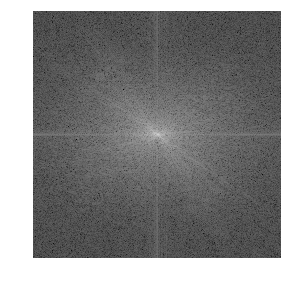

In [6]:
plt.axis('off')
plt.imshow(magnitude, cmap='gray')
plt.tight_layout(True)
plt.show()

In [7]:
cv2.imshow('magnitude', magnitude)
cv2.waitKey()
cv2.destroyAllWindows()

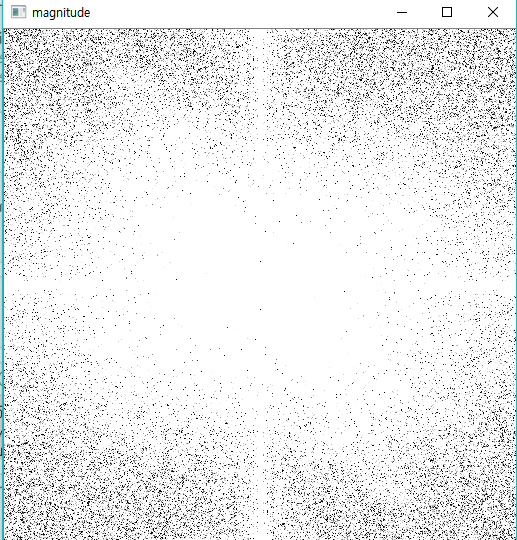

4. 이미지를 주파수 스펙트럼에서 다시 공간 표현으로 변환한다

In [8]:
restored = np.fft.ifft2(fft).astype(np.float32)

C:\Users\tjdwo\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [9]:
cv2.imshow('restored', restored)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(3.4.5) C:\projects\opencv-python\opencv\modules\imgcodecs\src\utils.cpp:622: error: (-15:Bad number of channels) Source image must have 1, 3 or 4 channels in function 'cvConvertImage'


- OpenCV에서 이산 푸리에 변환을 연산하는 함수 cv2.dft2와 역변환을 위한 함수 cv2.idft에서는 고속 푸리에 변환 알고리즘을 사용한다
- 이 함수는 출력이 실수인지 복소수인지를 결정하기 위한 선택적인 플래그로 cv2.DFT_REAL_OUTPUT과 cv2.DFT_COMPLEX_OUTPUT을 각각 지원하고, 또한 출력 값의 스케일 여부를 위한 cv2.DFT_SCALE 플래그를 지원한다
- 그리고 np.fft.fftshift 함수는 주파수가 0에 해당하는 진폭이 배열에 중심으로 이동하도록 주파수 스펙트럼을 이동시킨다
- 이를 통해 주파수의 해석이 쉬워지고 더 멀리까지 작업할 수 있다.